In [68]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

# symboler
x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
# vi må løse for x_2 og et gitt nyttenivå
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]

indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(U_0,a,b,x_1)


def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

# nye symboler
p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*x_1+p_2*x_2

# Beregne MSB

msb = sp.diff(U, x_1)/sp.diff(U,x_2)

x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]
budsj=bud.subs(x_2,x_2_rel)

x_1_eq= sp.solve(budsj-m,x_1)[0]

x_2_eq= x_2_rel.subs(x_1,x_1_eq)

U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

nytte = U_max.subs([(a,.4),(b,.35),(m,2500),(p_1,25),(p_2,30)])
x_1_num = x_1_eq.subs([(a,.4),(b,.35),(m,2500),(p_1,25),(p_2,30)])
x_2_num = x_2_eq.subs([(a,.4),(b,.35),(m,2500),(p_1,25),(p_2,30)])

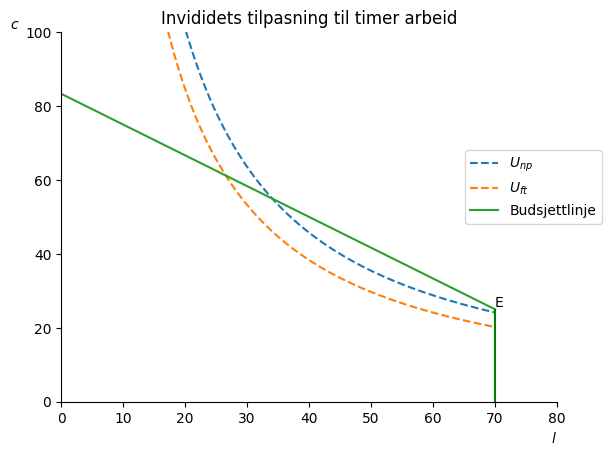

In [80]:
x=np.linspace(0.001,70, 100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$c$', loc='top', rotation=0)
                ax.set_xlabel('$l$', loc='right')
                ax.set(xlim=(0,80))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

# plott funksjonene
fig, ax = create_ax()

# Indifference curves
#ax.plot(x, indiff_x_2(nytte,.4,.35,x), label='$U_{pt}$')
ax.plot(x, indiff_x_2(nytte-1,.4,.35,x), label='$U_{np}$', ls= 'dashed')
ax.plot(x, indiff_x_2(nytte-2,.4,.35,x), label='$U_{ft}$', ls= 'dashed')
ax.plot(x, budsjett(2500, 25, 30, x), label = 'Budsjettlinje')

# tegn inn tilpasningen
#ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')
#ax.hlines(x_2_num,0,x_1_num, color='green',ls='dashed', label='$x_2$')
# tittel
ax.set_title('Invididets tilpasning til timer arbeid')

# Linje fra 70 timer til budsjettlinjen
ax.vlines(70,0,budsjett(2500, 25, 30, 70), color='green')
# Setter inn bokstaven E hvor linjen treffer budsjettlinjen
ax.text(70,25,'E', horizontalalignment='left', verticalalignment='bottom')

#vis navnene:
ax.legend(bbox_to_anchor=(0.8,0.7));


In [51]:
nytte

11.5049655140898